# Gráficos en Python 4:
# Gráficos con múltiples ejes, radiales y de torta



## Importar librerías requeridas

En la siguiente casilla importaremos los módulos necesarias para crear las visualizaciones.

In [1]:
# Importar el módulo pyploy de matplotlib y abreviarlo a plt
import matplotlib.pyplot as plt

# importaremos la función [`parallel_coordinates`]() desde el módulo `plotting` que tiene `pandas`. 
# Esta función es la encargada de crear el gráfico con múltiples ejes.
from pandas.plotting import parallel_coordinates

# Importar la librería pandas y abreviarlo a pd
import pandas as pd

## Grafico multiples ejes

## Cargar dataset

En esta ocasión, el _dataset_ contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

In [2]:
# Utilizar la función read_csv para cargar el archivo
df = pd.read_csv("iris.csv")

# Ver las primeras 5 líneas del archivo
df.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Ver las ultimas 5 líneas del archivo
df.tail(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


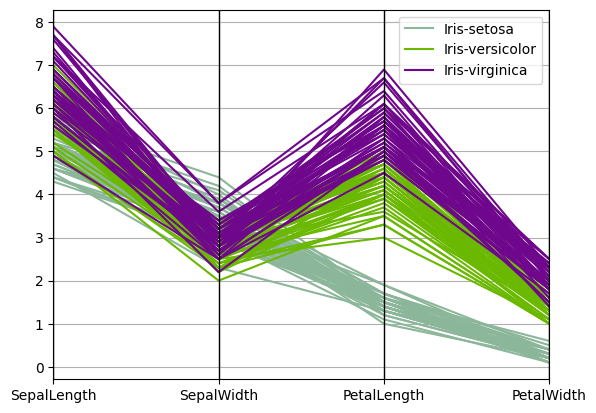

In [4]:
# Generar lista con las columnas a utilizar en la visualización
columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Name"]

# Se crea la visualización con la función `parallel_coordinates` en donde los argumentos son:
#  * df[columns]. Del dataset solo utilizar las columnas indicadas dentro de la lista `columns`. 
#    Si hay otra columna más, esa se ignora.
#  * Name. Se indica cual de las columnas se utilizará para determinar el color de la línea.
#  * color=['#556270', '#4ECDC4', '#C7F464']`. En esta parte, se está indicando que los 3 posibles colores 
#    a utilizar son los definidos en esa lista. Este argumento es opcional, se podría escribir solo 
#    parallel_coordinates(df[columns], 'Name') y la función se encarga de definir los colores necesarios.
parallel_coordinates(df[columns], 'Name')

# Visualizar el gráfico
plt.show()

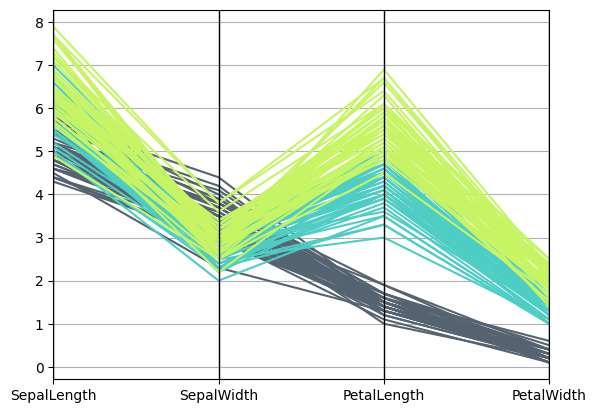

In [5]:
# Definir las columnas a utilizar
columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Name"]

# Crear el gráfico y guardarlo en una variable
ax = parallel_coordinates(df[columns], 'Name', color=['#556270', '#4ECDC4', '#C7F464'])

# Deshabilitar la legenda 
ax.legend().set_visible(False)

# Visualizar el gráfico
plt.show()

## Gráfico radial

### Cargar dataset

En esta ocasión, el _dataset_ corresponde a cuantas toneladas de paltas fueron cosechadas en cada mes durante el 2019.

**Importante**: el _dataset_ fue creado con solo fines educativos y para dar una semántica a los datos. No es información verdadera.

In [6]:
# Utilizar la función read_csv para cargar el archivo
df = pd.read_csv("cosechas.csv")

# Ver las primeras 5 líneas del archivo
df.head(5)

,mes,cosecha
0,Enero,3
1,Febrero,1
2,Marzo,1
3,Abril,6
4,Mayo,8


### Calcular ángulo para cada barra

Para un gráfico radial, es necesario definir en qué posicion estará cada dato y dado que la disposición es circular, la posición se debe indicar como angulos que estén entre 0 y 2xPI (0 y 6,28). 

Para lograr esto, necesitamos generar una lista con los ángulos de cada dato en donde nos aseguremos que cada dato tiene la misma separación y están entre 0 y 2xPI. A continuación se explica cada línea.

Este proceso se deberá hacer siempre que se quiera hacer un gráfico radial y se utilice `matplotlib` para visualizar.

In [7]:
# Crear variable con el valor de pi
PI = 3.14

# Crear variable con la cantidad de datos a visualizar
N = len(df["cosecha"])

# Crear variable que tendrá el valor del angulo de cada dato
angulo_actual = 0

# Crear lista que guardará cada valor
angulos = []

# Loop que finaliza solo cuando angulo_Actual sea mayor a 2*PI
while angulo_actual < PI*2:
    # Guardar el valor que tiene angulo_actual
    angulos.append(angulo_actual)
    
    # Aumentar el valor de angulo_actual en PI*2/N
    angulo_actual = angulo_actual + (PI*2)/N
    
# Imprimir la lista de angulos
print(angulos)

[0, 0.5233333333333333, 1.0466666666666666, 1.5699999999999998, 2.0933333333333333, 2.6166666666666667, 3.14, 3.6633333333333336, 4.1866666666666665, 4.71, 5.233333333333333, 5.756666666666667]


### Generar visualización


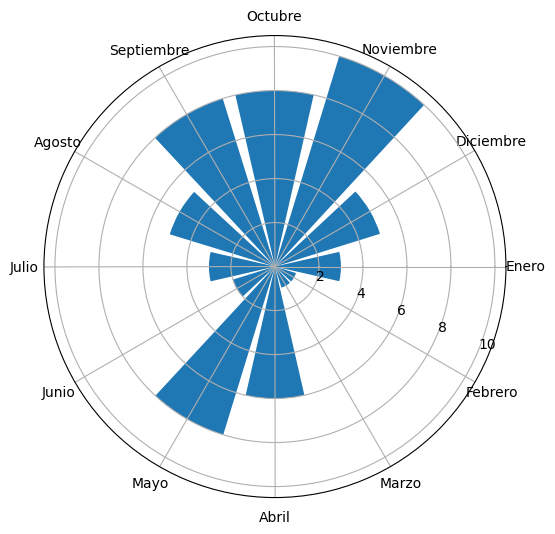

In [8]:
# Se crea una figura en matplotlib para poner el gráfico de tamaño 8x8  pulgadas
fig = plt.figure(figsize=(6, 6))

# A la figura se le agrega un gráfico con dispocisión circular (plot=True)
plot = fig.add_subplot(polar=True)

# Se crea el gráfico. Para esto se entregan 3 argumentos
#  * Primero se le entrega la lista de angulos para saber donde posicionar cada dato
#  * Luego se le entrega la lista de datos, en este caso `df["cosecha"]`
#  * Luego hacemos `width=2*PI/(N+1)` para indicar el ancho máximo que
#    tendrá cada dato. En este caso como la circunferencia completa es de
#    tamaño 2xPI, hacemos `2*PI/(N+1)` para que el ancho sea asumiendo un 
#    dato adicional que como no existe, será espacio en blanco. En caso de hacer 
#    2*PI/N, se está asignando todo el espacio de la circunferencia a cada dato  
#    y por lo tanto, no habrá separación entre cada dato. Se sugiere probar el 
#    cambia el (N+1) por otro valor como `N`, `N+2`, `2*N` para que vean el efecto 
#    de cambiar el ancho máximo.
plot.bar(angulos, df["cosecha"], width=2*PI/(N+2))

### Cambiar confuguración

# Indicar desde donde partir el primer dato, con PI/2 significa partir desde arriba
plot.set_theta_offset(0)

# Indicar la dirección hacia donde empezar a poner los datos, con -1 significa la derecha
plot.set_theta_direction(-1)

# Indicar la posición de cada etiqueta radial
plot.xaxis.set_ticks(angulos)

# Indicar el texto de cada etiqueta radial.
plot.set_xticklabels(df["mes"])

# Visualizar el gráfico
plt.show()

## Gráfico de torta

### Cargar dataset

En esta ocasión, el _dataset_ corresponde a los ingredientes y cantidad en gramos requerida para hacer un pie de berries.

**Importante**: el _dataset_ fue creado con solo fines educativos y para dar una semántica a los datos. No es información verdadera.

In [9]:
# Utilizar la función read_csv para cargar el archivo
df = pd.read_csv("pie.csv")

# Ver las primeras 5 líneas del archivo
df.head(5)

,ingredientes,gramos
0,Harina,375
1,Azucar,75
2,Mantequilla,250
3,Berries,300


### Generar visualización

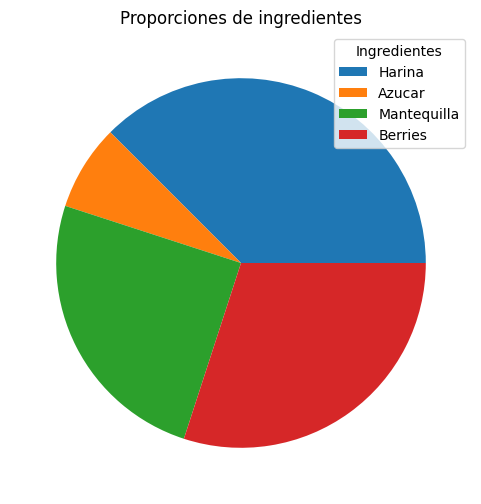

In [10]:
# Se crea una figura en matplotlib para poner el gráfico de tamaño 8x8  pulgadas
fig = plt.figure(figsize=(6, 6))

# A la figura se le agrega un gráfico
plot = fig.add_subplot()

# Se crea un gráfico de torta con el método pie y se le entrega la lista de valores.
# En este caso el método retorna una lista con los diferentes objetos presentes en la visualización
# El primero es una lista de cada segmento circular, en este caso, son 4 segmentos (1 por ingrediente)
pie_plot = plot.pie(df["gramos"])

# Se agrega la leyenda en donde se le entrega la listra de cada segmento circular
# una lista de strings que será el nombre asignado a cada elemento
# y opcionalmente hacer title="Ingredientes" para darle un título a la leyenda
plot.legend(pie_plot[0], df["ingredientes"], title="Ingredientes")

#Se asigna un título al gráfico
plot.set_title("Proporciones de ingredientes")

# Visualizar el gráfico
plt.show()